## House Rent Prediction Using Linear Regression

### Objective

Build a predictive model using Linear Regression to estimate house rent based on features
from the provided dataset. This project helps understand data preprocessing, EDA,
regression modeling, evaluation metrics, and visualization.


### About
The dataset contains 4700+ listings of rental properties across India, covering a wide
spectrum from huts to high-rise apartments. It includes features like size, number of
bedrooms, furnishing status, tenant preferences, locality, and more


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load the dataset

In [3]:
data=pd.read_csv("House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
data.shape

(4746, 12)

In [23]:
data['Posted On'] = pd.to_datetime(data['Posted On'])

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


No null value is present in the dataset


4 Numerical columns: ['BHK', 'Rent', 'Size', 'Bathroom']

8 Non-numerical columns: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [12]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

No Duplicate rows are present

In [28]:
# unique values in each column
unique_values=data.nunique()
print(unique_values)

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64


### EDA

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64
City
Mumbai       0.204804
Chennai      0.187737
Bangalore    0.186684
Hyderabad    0.182891
Delhi        0.127476
Kolkata      0.110409
Name: proportion, dtype: float64


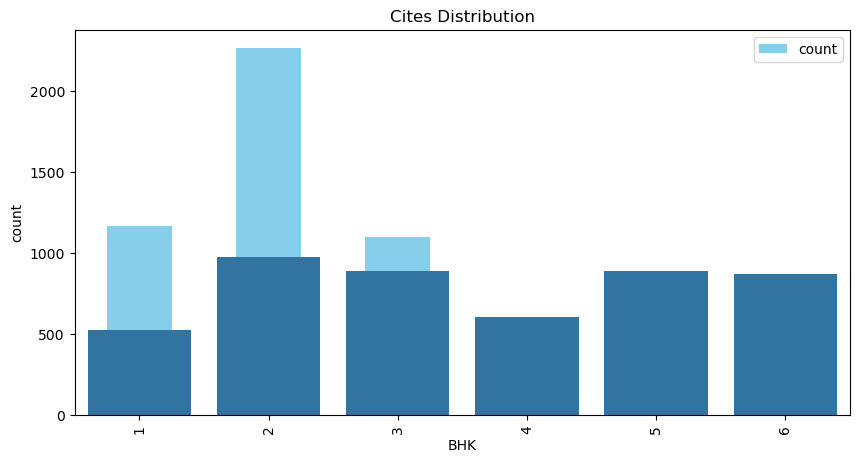

In [32]:
# univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns


print(data['City'].value_counts())
print(data['City'].value_counts(normalize=True))  

# Plot
sns.countplot(x='City', data=data)
plt.title("Cites Distribution")
plt.show()
